##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Scikit-Learn Model Card Toolkit Demo


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/responsible_ai/model_card_toolkit/examples/Scikit_Learn_Model_Card_Toolkit_Demo"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/model-card-toolkit/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Background
This notebook demonstrates how to generate a model card using the Model Card Toolkit with a scikit-learn model in a Jupyter/Colab environment. You can learn more about model cards at [https://modelcards.withgoogle.com/about](https://modelcards.withgoogle.com/about).

## Setup
We first need to install and import the necessary packages.

### Upgrade to Pip 20.2 and Install Packages

In [2]:
!pip install --upgrade pip==21.3
!pip install -U seaborn scikit-learn model-card-toolkit

You should consider upgrading via the '/tmpfs/src/tf_docs_env/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/tmpfs/src/tf_docs_env/bin/python -m pip install --upgrade pip' command.


### Did you restart the runtime?

If you are using Google Colab, the first time that you run the cell above, you must restart the runtime (Runtime > Restart runtime ...).

### Import packages

We import necessary packages, including scikit-learn.

In [3]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

## Load data

This example uses the Breast Cancer Wisconsin Diagnostic dataset that scikit-learn can load using the [load_breast_cancer()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function.

In [4]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
X_train.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
17         16.13         20.68          108.10      798.8          0.11700   
117        14.87         16.67           98.64      682.5          0.11620   
195        12.91         16.33           82.53      516.4          0.07941   
337        18.77         21.43          122.90     1092.0          0.09116   
509        15.46         23.95          103.80      731.3          0.11830   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
17            0.20220         0.17220              0.10280         0.2164   
117           0.16490         0.16900              0.08923         0.2157   
195           0.05366         0.03873              0.02377         0.1829   
337           0.14020         0.10600              0.06090         0.1953   
509           0.18700         0.20300              0.08520         0.1807   

     mean fractal dimension  ...  worst radius  worst texture  \
17                  0.07356  ...         20.96          31.48   
117                 0.06768  ...         18.81          27.37   
195                 0.05667  ...         13.88          22.00   
337                 0.06083  ...         24.54          34.37   
509                 0.07083  ...         17.11          36.33   

     worst perimeter  worst area  worst smoothness  worst compactness  \
17            136.80      1315.0            0.1789             0.4233   
117           127.10      1095.0            0.1878             0.4480   
195            90.81       600.6            0.1097             0.1506   
337           161.10      1873.0            0.1498             0.4827   
509           117.70       909.4            0.1732             0.4967   

     worst concavity  worst concave points  worst symmetry  \
17            0.4784               0.20730          0.3706   
117           0.4704               0.20270          0.3585   
195           0.1764               0.08235          0.3024   
337           0.4634               0.20480          0.3679   
509           0.5911               0.21630          0.3013   

     worst fractal dimension  
17                   0.11420  
117                  0.10650  
195                  0.06949  
337                  0.09870  
509                  0.10670  

[5 rows x 30 columns]

In [6]:
y_train.head()

17     0
117    0
195    1
337    0
509    0
dtype: int64

## Plot data

We will create several plots from the data that we will include in the model card.

In [7]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

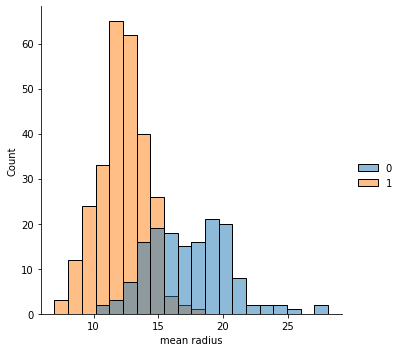

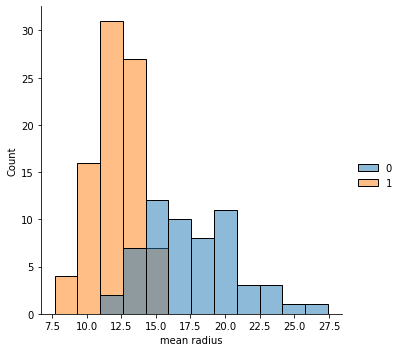

In [8]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

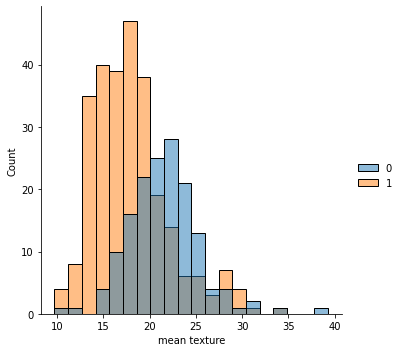

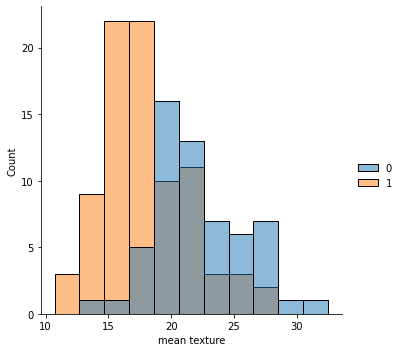

In [9]:
# Plot the mean texture feature for both the train and test sets

sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str()

sns.displot(x=X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

## Train model

In [10]:
# Create a classifier and fit the training data

clf = GradientBoostingClassifier().fit(X_train, y_train)

## Evaluate model

/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


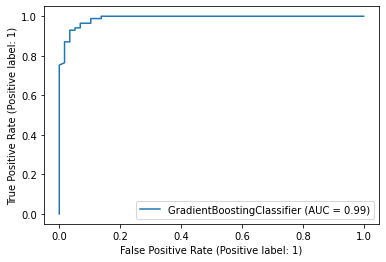

In [11]:
# Plot a ROC curve

plot_roc_curve(clf, X_test, y_test)
roc_curve = plot_to_str()

/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


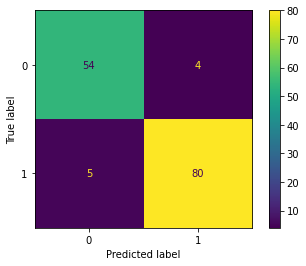

In [12]:
# Plot a confusion matrix

plot_confusion_matrix(clf, X_test, y_test)
confusion_matrix = plot_to_str()

## Create a model card

### Initialize toolkit and model card

In [13]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Annotate information into model card

In [14]:
model_card.model_details.name = 'Breast Cancer Wisconsin (Diagnostic) Dataset'
model_card.model_details.overview = (
    'This model predicts whether breast cancer is benign or malignant based on '
    'image measurements.')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.references = [
    mctlib.Reference(reference='https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)'),
    mctlib.Reference(reference='https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf')
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Breast cancer diagnosis')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Breast cancer diagnosis')]
model_card.considerations.users = [mctlib.User(description='Medical professionals'), mctlib.User(description='ML researchers')]

model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=mean_radius_train),
    mctlib.Graphic(image=mean_texture_train)
]
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection = [
    mctlib.Graphic(image=mean_radius_test),
    mctlib.Graphic(image=mean_texture_test)
]
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve),
    mctlib.Graphic(image=confusion_matrix)
]

mct.update_model_card(model_card)

## Generate model card

In [15]:
# Return the model card document as an HTML page

html = mct.export_format()

display.display(display.HTML(html))